Import Libraries

In [1]:
from lib2to3.pgen2.pgen import DFAState
import math
import statistics # for descriptive statistics
import numpy as np # for single/multi dimensional arrays
from scipy import stats # scientific computing based on numpy
import pandas as pd 
import matplotlib.pyplot # for data visualization
from pandas.plotting import scatter_matrix # for plotting data
from statsmodels.formula.api import ols 
import seaborn ## for statistical visualizations

In [2]:
sparcs=pd.read_csv('https://health.data.ny.gov/resource/gnzp-ekau.csv')

In [3]:
sparcs

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,payment_typology_2,payment_typology_3,birth_weight,abortion_edit_indicator,emergency_department_indicator,total_charges,total_costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Private Health Insurance,NaN,0,N,N,3913.23,3466.83
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,M,White,Not Span/Hispanic,...,Minor,Medical,Self-Pay,NaN,NaN,0,N,Y,3597.10,3746.80
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Federal/State/Local/VA,NaN,0,N,Y,9149.22,8322.10
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicaid,NaN,0,N,Y,5880.61,5828.87
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,7019.76,6604.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,18 to 29,148,F,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,Private Health Insurance,Medicaid,0,N,N,9919.75,6485.86
996,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,148,M,White,Not Span/Hispanic,...,Major,Medical,Medicare,Self-Pay,Self-Pay,0,N,Y,21794.75,13726.59
997,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,30 to 49,148,F,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,Self-Pay,Self-Pay,0,N,N,7557.50,5175.34
998,NaN,NaN,NaN,NaN,Redacted for Confidentiality,50 to 69,NaN,M,White,Unknown,...,Minor,Medical,Medicare,Medicaid,Self-Pay,0,N,Y,17047.25,18075.81


### Examining DataFrame

In [4]:

sparcs.shape # 1000 rows x 34 columns

(1000, 34)

In [5]:
sparcs.columns # view column name

Index(['health_service_area', 'hospital_county',
       'operating_certificate_number', 'facility_id', 'facility_name',
       'age_group', 'zip_code_3_digits', 'gender', 'race', 'ethnicity',
       'length_of_stay', 'type_of_admission', 'patient_disposition',
       'discharge_year', 'ccs_diagnosis_code', 'ccs_diagnosis_description',
       'ccs_procedure_code', 'ccs_procedure_description', 'apr_drg_code',
       'apr_drg_description', 'apr_mdc_code', 'apr_mdc_description',
       'apr_severity_of_illness_code', 'apr_severity_of_illness_description',
       'apr_risk_of_mortality', 'apr_medical_surgical_description',
       'payment_typology_1', 'payment_typology_2', 'payment_typology_3',
       'birth_weight', 'abortion_edit_indicator',
       'emergency_department_indicator', 'total_charges', 'total_costs'],
      dtype='object')

In [6]:
sparcs.dtypes # view data types 

health_service_area                     object
hospital_county                         object
operating_certificate_number           float64
facility_id                            float64
facility_name                           object
age_group                               object
zip_code_3_digits                       object
gender                                  object
race                                    object
ethnicity                               object
length_of_stay                           int64
type_of_admission                       object
patient_disposition                     object
discharge_year                           int64
ccs_diagnosis_code                       int64
ccs_diagnosis_description               object
ccs_procedure_code                       int64
ccs_procedure_description               object
apr_drg_code                             int64
apr_drg_description                     object
apr_mdc_code                             int64
apr_mdc_descr

In [7]:
print(sparcs['gender'])

0      F
1      M
2      F
3      M
4      M
      ..
995    F
996    M
997    F
998    M
999    F
Name: gender, Length: 1000, dtype: object


In [8]:
#simple selector: female and avg about of time they stay 
sparcs[sparcs['gender'] == 'F']['length_of_stay'].mean() 

3.2769726247987117

In [9]:
sparcs.describe() # quick view a large dataframe

,operating_certificate_number,facility_id,length_of_stay,discharge_year,ccs_diagnosis_code,ccs_procedure_code,apr_drg_code,apr_mdc_code,apr_severity_of_illness_code,birth_weight,total_charges,total_costs
count,992.000000,992.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,228305.546371,38.987903,3.446000,2016.0,162.346000,83.419000,466.211000,11.490000,1.827000,703.600000,12954.426590,10103.517850
std,7769.500403,1.266607,2.917121,0.0,95.533056,83.052436,214.849307,5.134224,0.871683,1388.046726,12228.596473,12149.476518
min,226700.000000,37.000000,1.000000,2016.0,2.000000,0.000000,43.000000,1.000000,1.000000,0.000000,1527.250000,660.030000
25%,228000.000000,39.000000,2.000000,2016.0,122.000000,0.000000,248.500000,6.000000,1.000000,0.000000,5419.187500,2996.962500
50%,228000.000000,39.000000,3.000000,2016.0,187.000000,92.000000,540.000000,14.000000,2.000000,0.000000,9829.625000,6134.855000
75%,228000.000000,39.000000,4.000000,2016.0,218.000000,137.000000,640.000000,15.000000,2.000000,0.000000,15681.875000,12881.465000
max,401001.000000,66.000000,27.000000,2016.0,662.000000,231.000000,951.000000,23.000000,4.000000,4900.000000,121678.110000,109008.010000


In [12]:
#splitting dataframe on values of categorical variables 
groupby_gender = sparcs.groupby('gender')

In [13]:
for gender, value in groupby_gender['length_of_stay']: print((gender, value.mean()))

('F', 3.2769726247987117)
('M', 3.7229551451187337)


In [15]:
# How many males/females were included in this study?
groupby_gender.count()

,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code_3_digits,race,ethnicity,length_of_stay,...,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,payment_typology_2,payment_typology_3,birth_weight,abortion_edit_indicator,emergency_department_indicator,total_charges,total_costs
gender,,,,,,,,,,,,,,,,,,,,,
F,618,618,618,618,621,621,610,621,621,621,...,621,621,621,613,604,621,621,621,621,621
M,374,374,374,374,379,379,368,379,379,379,...,379,379,379,364,361,379,379,379,379,379


### Frequencies

In [35]:
sparcs.age_group.unique() # use .unique() to return the sample space leemnts of a column

array(['70 or Older', '30 to 49', '50 to 69', '18 to 29', '0 to 17'],
      dtype=object)

In [36]:
sparcs.age_group.value_counts() # counting the number of times the unique values appear

70 or Older    282
0 to 17        223
50 to 69       208
18 to 29       169
30 to 49       118
Name: age_group, dtype: int64

In [40]:
sparcs.age_group.value_counts(normalize=True) #expressing the relative frequency

70 or Older    0.282
0 to 17        0.223
50 to 69       0.208
18 to 29       0.169
30 to 49       0.118
Name: age_group, dtype: float64

In [41]:
sparcs.age_group.value_counts(normalize=True) * 100 # expressing the relative frequency as a percentage 

70 or Older    28.2
0 to 17        22.3
50 to 69       20.8
18 to 29       16.9
30 to 49       11.8
Name: age_group, dtype: float64

### Grouped Frequencies

In [42]:
pd.crosstab(sparcs.emergency_department_indicator, sparcs.age_group)

age_group,0 to 17,18 to 29,30 to 49,50 to 69,70 or Older
emergency_department_indicator,,,,,
N,212,145,84,44,42
Y,11,24,34,164,240


array([[<AxesSubplot:xlabel='length_of_stay', ylabel='length_of_stay'>,
        <AxesSubplot:xlabel='birth_weight', ylabel='length_of_stay'>,
        <AxesSubplot:xlabel='total_charges', ylabel='length_of_stay'>,
        <AxesSubplot:xlabel='total_costs', ylabel='length_of_stay'>],
       [<AxesSubplot:xlabel='length_of_stay', ylabel='birth_weight'>,
        <AxesSubplot:xlabel='birth_weight', ylabel='birth_weight'>,
        <AxesSubplot:xlabel='total_charges', ylabel='birth_weight'>,
        <AxesSubplot:xlabel='total_costs', ylabel='birth_weight'>],
       [<AxesSubplot:xlabel='length_of_stay', ylabel='total_charges'>,
        <AxesSubplot:xlabel='birth_weight', ylabel='total_charges'>,
        <AxesSubplot:xlabel='total_charges', ylabel='total_charges'>,
        <AxesSubplot:xlabel='total_costs', ylabel='total_charges'>],
       [<AxesSubplot:xlabel='length_of_stay', ylabel='total_costs'>,
        <AxesSubplot:xlabel='birth_weight', ylabel='total_costs'>,
        <AxesSubplot:xlabel

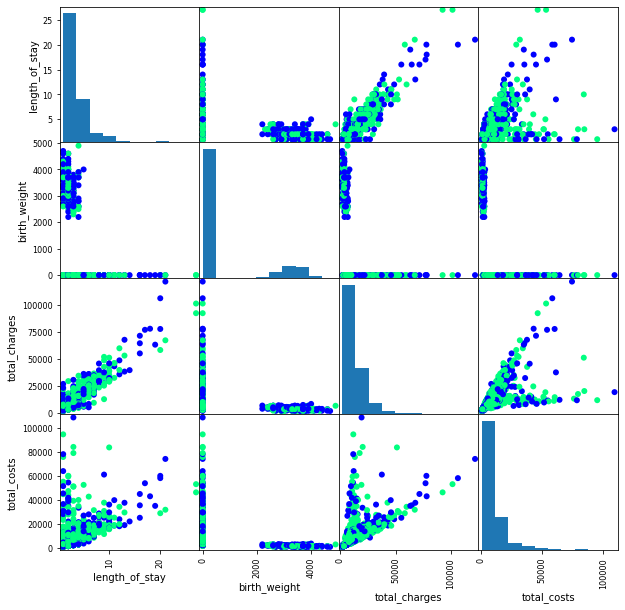

In [29]:
# Plotting Data
scatter_matrix(sparcs[['length_of_stay', 'birth_weight', 'total_charges', 'total_costs']], c=(sparcs['gender'] == 'F'), figsize=(10,10), alpha=1, marker='o', cmap='winter')
#alpha = # for transparency
#figsize = (20,20) for wxh size
#cmap = color map
#marker = 'shape' ('o', 'x')

### Hypothesis Testing: comparing 2 groups

In [48]:
# Compare difference between birth weight in males and females 
# tests if population of mean of data is likely to be equal to a given value 
stats.ttest_1samp(sparcs['birth_weight'], 0)

Ttest_1sampResult(statistic=16.029565287165426, pvalue=1.2352039218252227e-51)

In [49]:
male_bw = sparcs[sparcs['gender'] == 'M']['birth_weight']

In [50]:
female_bw = sparcs[sparcs['gender'] == 'F']['birth_weight']

In [51]:
stats.ttest_ind(male_bw, female_bw)

Ttest_indResult(statistic=5.730804104532916, pvalue=1.3230646988456851e-08)

In [53]:
#Testing the difference between total_costs in males and females using non parametric statistics
female_total_costs = sparcs[sparcs['gender'] == 'F']['total_costs']

In [55]:
male_total_costs = sparcs[sparcs['gender'] == 'M']['total_costs']

In [56]:
stats.mannwhitneyu(female_total_costs, male_total_costs)

MannwhitneyuResult(statistic=116925.5, pvalue=0.43248295025479616)